# Importing required libraries

In [ ]:
!pip -q install skimpy
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import numpy as np 
import pandas as pd 
import skimpy 
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go


# What are we supposed to predict 
we have to predict that the sound contains bird sound or not if the voice note contains sound of bird then target is True otherwise target is false 

# What is the evaluation metric ? 
## Macro F1 Score. 
link to understand the evalutation metric: https://medium.com/analytics-vidhya/performance-metrics-for-machine-learning-models-80d7666b432e#:~:text=Macro%20F1%2DScore%3A%20Macro%20F1,Classes%20and%20K%20%E2%88%88%20C.

Macro F1-Score: Macro F1-score (short for macro-averaged F1 score) is used to assess the quality of problems with multiple binary labels or multiple classes.
Macro F1-score is defined as the average harmonic mean of precision and recall of each class:
C is the Number of Classes and K ∈ C.

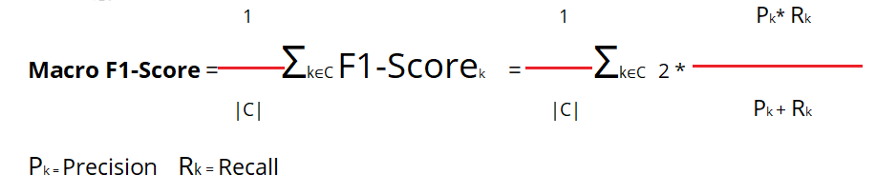

Macro F1-score will give the same importance to each label/class. It will be low for models that only perform well on the common classes while performing poorly on the rare classes.

# Reading the Data

In [ ]:
taxo = pd.read_csv("../input/birdclef-2022/eBird_Taxonomy_v2021.csv")
ss = pd.read_csv("../input/birdclef-2022/sample_submission.csv")
train = pd.read_csv("../input/birdclef-2022/train_metadata.csv")
test = pd.read_csv("../input/birdclef-2022/test.csv")
scored = pd.read_json("../input/birdclef-2022/scored_birds.json")
train_meta = pd.read_csv("../input/birdclef-2022/train_metadata.csv")

# 📷Skimpy

In [ ]:
skimpy.skim(taxo)

In [ ]:
skimpy.skim(train)

In [ ]:
skimpy.skim(train_meta)

In [ ]:
skimpy.skim(test)

# 🖼️ Train 

In [ ]:
train.head()

In [ ]:
fig = px.scatter_geo(train ,lat = "latitude", lon = "longitude", color = "primary_label")
fig.show()

In [ ]:
fig = px.bar( x = train.scientific_name.value_counts().keys(), y = train.scientific_name.value_counts().values)

fig.update_layout(
    title="Scientific names frequency",
    xaxis_title="species name",
    yaxis_title="species freqency",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
fig = px.bar( x = train.common_name.value_counts().keys(), y = train.common_name.value_counts().values)

fig.update_layout(
    title="common_name frequency",
    xaxis_title="common_name",
    yaxis_title="common_name freqency",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
fig = px.bar( x = train.author.value_counts().keys(), y = train.author.value_counts().values)

fig.update_layout(
    title="author frequency",
    xaxis_title="author",
    yaxis_title="author freqency",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
fig = px.scatter_geo(data_frame = train , lat = "latitude", lon ="longitude", color = "rating", hover_data=["rating", "primary_label"])
fig.update_layout(
    title="rating with primary_labels",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    ),
    margin=dict(l=40, r=40, t=100, b=80)

)
fig.show()

In [ ]:
fig = px.bar(x = train.time.value_counts().keys()[:100], y = train.time.value_counts().values[:100])
fig.update_layout(
    title="time duration of songs (TOP100)",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    ),
    xaxis_title="time duration of songs",
    yaxis_title="freqency",
    margin=dict(l=40, r=40, t=100, b=80)

)
fig.show()

## Taxonomy dataframe vis

In [ ]:
taxo.head()

In [ ]:
fig = px.bar(x = taxo.CATEGORY.value_counts().keys(), y =taxo.CATEGORY.value_counts().values, color = taxo.CATEGORY.value_counts().values ,)
fig.update_layout(title = "taxonomy categories", 
                    font=dict(
                        family="Courier New, monospace",
                        size=10,
                        color="RebeccaPurple"
                    ),
                    xaxis_title="category",
                    yaxis_title="no of category",
                    margin=dict(l=40, r=40, t=100, b=80)
                 )